Import packages.

In [51]:
import os
import random
import sys

import matplotlib.pyplot as plt
import torch
import yaml

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from signal_autoencoder.modeling import ConvRecAutoencoder

Load dataloadoer.

In [52]:
dataloader = torch.load('../data/dataloader.pth')
dataloader.dataset.path = '../data'

Plot a 3-channel seismic event signal.

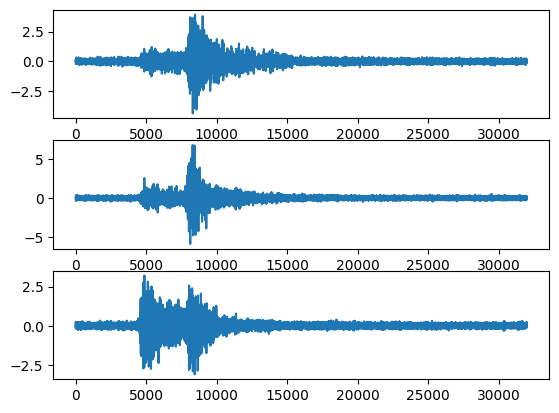

In [53]:
i = random.randint(0, len(dataloader.dataset))

dataloader.dataset.plot(i)

Load the trained autoencoder.

In [54]:
with open('../scripts/config.yml', 'r') as f:
    config = yaml.safe_load(f)

n_conv_channel_1 = config['conv_rec_net']['n_conv_channel_1']
n_conv_channel_2 = config['conv_rec_net']['n_conv_channel_2']
n_conv_channel_3 = config['conv_rec_net']['n_conv_channel_3']
lstm_hidden_size = config['conv_rec_net']['lstm_hidden_size']
n_lstm_layer = config['conv_rec_net']['n_lstm_layer']
model = ConvRecAutoencoder(3, n_conv_channel_1, n_conv_channel_2,
                           n_conv_channel_3, lstm_hidden_size,
                           n_lstm_layer)
checkpoint = torch.load('../scripts/model.pt', map_location=torch.device('cpu'))

Plot the reconstruction from encoding-decoding.

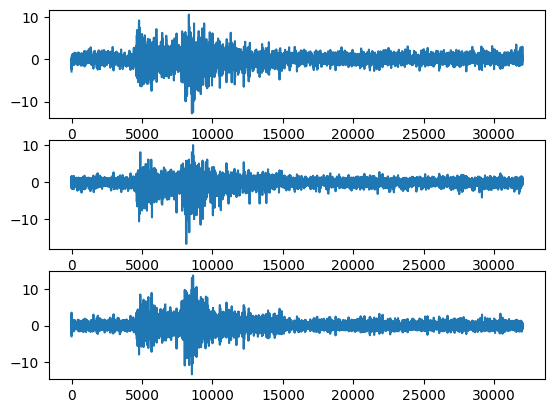

In [55]:
x, _ = dataloader.dataset[i]
with torch.no_grad():
    y = model(x[None, :, :])
    y = y.squeeze()

fig, axs = plt.subplots(3)
axs[0].plot(y[:, 0])
axs[1].plot(y[:, 1])
axs[2].plot(y[:, 2])
plt.show()